In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/Users/jstark/Desktop/TUD_classes/BNM/Exercise/Exercise_10_RungeKutta_Butcher_AdaptiveStepSize')
import RK_solvers

# Solve linear ODE

In [2]:
def ode(y):
    return -15 * y

## Using Explicit Euler

In [3]:
def explicit_euler(y0, t0, tf, h, f):
    N    = int((tf - t0) / h)
    time = np.arange(t0, N*h, h)
    
    y    = np.zeros(N)
    y[0] = y0 # I.C.
    
    for n in range(N-1):
        y[n+1] = y[n] + h * f(y[n])
    
    return time, y

In [4]:
y0 = 1
t0 = 0
tf = 1
h1 = 0.25
h2 = 0.125

time_h1, y_euler_h1 = explicit_euler(y0, t0, tf, h1, ode)
time_h2, y_euler_h2 = explicit_euler(y0, t0, tf, h2, ode)

## Using Implicit Trapezoidal Method 

In [5]:


# time_h1, y_trapezoidal = trapezoidal_stepper(y0, y1_init_h1, h1, ode, t0, tf, RTOL, ATOL)

In [6]:
def fixed_point_iteration(yn, yn_plus1_init, h, f, numIntegrator, RTOL, ATOL):
    y_k = yn_plus1_init
    repeat = 1
    i = 0
    while(repeat):
        i += 1
        print("\nFixed point iteration ", i)
        y_kplus1 = numIntegrator(yn, y_k, h, f)
        if abs(y_kplus1 - y_k) <= RTOL*y_k + ATOL:
            repeat = 0
            return y_kplus1
        y_k = y_kplus1
    
    
    
def trapezoidal_method(yn, yn_plus1, h, f):
    print("yn = ", yn, "yn_plus1 = ", yn_plus1)
    return yn + h/2 * (f(yn) + f(yn_plus1))


def trapezoidal_stepper(y0, h, f, t0, tf, RTOL, ATOL):
    N    = int((tf - t0) / h)
    time = np.arange(t0, N*h, h)
    
    y    = np.zeros(N)
    y[0] = y0 # I.C.
    
    for n in range(N-1):
        y[n+1] = y[n] + h * f(y[n]) # 1 Euler step to compute an initial y_nplus1_k for fixed-point-iteration
        y[n+1] = fixed_point_iteration(y[n], y[n+1], h, f, trapezoidal_method, RTOL, ATOL)

    return time, y

In [7]:
RTOL = 10**(-15); ATOL = 10**(-15)

y0 = 1
t0 = 0
tf = 1
h1 = 0.25
h2 = 0.125
time_h2, y_trapezoidal = trapezoidal_stepper(y0, h2, ode, t0, tf, RTOL, ATOL)


Fixed point iteration  1
yn =  1.0 yn_plus1 =  -0.875

Fixed point iteration  2
yn =  1.0 yn_plus1 =  0.8828125

Fixed point iteration  3
yn =  1.0 yn_plus1 =  -0.76513671875

Fixed point iteration  4
yn =  1.0 yn_plus1 =  0.779815673828125

Fixed point iteration  5
yn =  1.0 yn_plus1 =  -0.6685771942138672

Fixed point iteration  6
yn =  1.0 yn_plus1 =  0.6892911195755005

Fixed point iteration  7
yn =  1.0 yn_plus1 =  -0.5837104246020317

Fixed point iteration  8
yn =  1.0 yn_plus1 =  0.6097285230644047

Fixed point iteration  9
yn =  1.0 yn_plus1 =  -0.5091204903728794

Fixed point iteration  10
yn =  1.0 yn_plus1 =  0.5398004597245745

Fixed point iteration  11
yn =  1.0 yn_plus1 =  -0.44356293099178856

Fixed point iteration  12
yn =  1.0 yn_plus1 =  0.4783402478048018

Fixed point iteration  13
yn =  1.0 yn_plus1 =  -0.38594398231700167

Fixed point iteration  14
yn =  1.0 yn_plus1 =  0.42432248342218903

Fixed point iteration  15
yn =  1.0 yn_plus1 =  -0.3353023282083023

Fixed

yn =  1.0 yn_plus1 =  0.03225791496843322

Fixed point iteration  244
yn =  1.0 yn_plus1 =  0.03225820471709384

Fixed point iteration  245
yn =  1.0 yn_plus1 =  0.03225793307772451

Fixed point iteration  246
yn =  1.0 yn_plus1 =  0.03225818773963329

Fixed point iteration  247
yn =  1.0 yn_plus1 =  0.03225794899409373

Fixed point iteration  248
yn =  1.0 yn_plus1 =  0.03225817281803711

Fixed point iteration  249
yn =  1.0 yn_plus1 =  0.03225796298309025

Fixed point iteration  250
yn =  1.0 yn_plus1 =  0.032258159703352884

Fixed point iteration  251
yn =  1.0 yn_plus1 =  0.0322579752781067

Fixed point iteration  252
yn =  1.0 yn_plus1 =  0.03225814817677497

Fixed point iteration  253
yn =  1.0 yn_plus1 =  0.03225798608427344

Fixed point iteration  254
yn =  1.0 yn_plus1 =  0.032258138045993645

Fixed point iteration  255
yn =  1.0 yn_plus1 =  0.032257995581880916

Fixed point iteration  256
yn =  1.0 yn_plus1 =  0.03225812914198667

Fixed point iteration  257
yn =  1.0 yn_plus1

yn =  1.0 yn_plus1 =  0.03225806451607571

Fixed point iteration  474
yn =  1.0 yn_plus1 =  0.032258064516178964

Fixed point iteration  475
yn =  1.0 yn_plus1 =  0.03225806451608226

Fixed point iteration  476
yn =  1.0 yn_plus1 =  0.03225806451617286

Fixed point iteration  477
yn =  1.0 yn_plus1 =  0.032258064516087925

Fixed point iteration  478
yn =  1.0 yn_plus1 =  0.03225806451616753

Fixed point iteration  479
yn =  1.0 yn_plus1 =  0.03225806451609292

Fixed point iteration  480
yn =  1.0 yn_plus1 =  0.032258064516162865

Fixed point iteration  481
yn =  1.0 yn_plus1 =  0.03225806451609736

Fixed point iteration  482
yn =  1.0 yn_plus1 =  0.03225806451615876

Fixed point iteration  483
yn =  1.0 yn_plus1 =  0.03225806451610114

Fixed point iteration  484
yn =  1.0 yn_plus1 =  0.032258064516155205

Fixed point iteration  485
yn =  1.0 yn_plus1 =  0.03225806451610447

Fixed point iteration  486
yn =  1.0 yn_plus1 =  0.032258064516152096

Fixed point iteration  487
yn =  1.0 yn_pl

Fixed point iteration  114
yn =  0.03225806451612856 yn_plus1 =  0.0010604951157277727

Fixed point iteration  115
yn =  0.03225806451612856 yn_plus1 =  0.001021914861263247

Fixed point iteration  116
yn =  0.03225806451612856 yn_plus1 =  0.0010580838498237405

Fixed point iteration  117
yn =  0.03225806451612856 yn_plus1 =  0.0010241754230482791

Fixed point iteration  118
yn =  0.03225806451612856 yn_plus1 =  0.0010559645731502733

Fixed point iteration  119
yn =  0.03225806451612856 yn_plus1 =  0.0010261622449296535

Fixed point iteration  120
yn =  0.03225806451612856 yn_plus1 =  0.0010541019276364832

Fixed point iteration  121
yn =  0.03225806451612856 yn_plus1 =  0.0010279084750988328

Fixed point iteration  122
yn =  0.03225806451612856 yn_plus1 =  0.0010524648368528781

Fixed point iteration  123
yn =  0.03225806451612856 yn_plus1 =  0.0010294432477084628

Fixed point iteration  124
yn =  0.03225806451612856 yn_plus1 =  0.0010510259875313524

Fixed point iteration  125
yn =  


Fixed point iteration  364
yn =  0.03225806451612856 yn_plus1 =  0.0010405827282853157

Fixed point iteration  365
yn =  0.03225806451612856 yn_plus1 =  0.0010405827244905526

Fixed point iteration  366
yn =  0.03225806451612856 yn_plus1 =  0.0010405827280481408

Fixed point iteration  367
yn =  0.03225806451612856 yn_plus1 =  0.0010405827247129025

Fixed point iteration  368
yn =  0.03225806451612856 yn_plus1 =  0.0010405827278396895

Fixed point iteration  369
yn =  0.03225806451612856 yn_plus1 =  0.001040582724908326

Fixed point iteration  370
yn =  0.03225806451612856 yn_plus1 =  0.0010405827276564784

Fixed point iteration  371
yn =  0.03225806451612856 yn_plus1 =  0.001040582725080088

Fixed point iteration  372
yn =  0.03225806451612856 yn_plus1 =  0.001040582727495451

Fixed point iteration  373
yn =  0.03225806451612856 yn_plus1 =  0.0010405827252310505

Fixed point iteration  374
yn =  0.03225806451612856 yn_plus1 =  0.0010405827273539253

Fixed point iteration  375
yn =  0

yn =  0.0010405827263262508 yn_plus1 =  3.315833790639854e-05

Fixed point iteration  122
yn =  0.0010405827263262508 yn_plus1 =  3.395047860814209e-05

Fixed point iteration  123
yn =  0.0010405827263262508 yn_plus1 =  3.3207846700257374e-05

Fixed point iteration  124
yn =  0.0010405827263262508 yn_plus1 =  3.3904064113899485e-05

Fixed point iteration  125
yn =  0.0010405827263262508 yn_plus1 =  3.325136028860991e-05

Fixed point iteration  126
yn =  0.0010405827263262508 yn_plus1 =  3.386327012481886e-05

Fixed point iteration  127
yn =  0.0010405827263262508 yn_plus1 =  3.328960465337309e-05

Fixed point iteration  128
yn =  0.0010405827263262508 yn_plus1 =  3.3827416032853296e-05

Fixed point iteration  129
yn =  0.0010405827263262508 yn_plus1 =  3.332321786459077e-05

Fixed point iteration  130
yn =  0.0010405827263262508 yn_plus1 =  3.379590364733674e-05

Fixed point iteration  131
yn =  0.0010405827263262508 yn_plus1 =  3.335276072601251e-05

Fixed point iteration  132
yn =  0

yn =  0.0010405827263262508 yn_plus1 =  3.3567184679987204e-05

Fixed point iteration  372
yn =  0.0010405827263262508 yn_plus1 =  3.356718475790274e-05

Fixed point iteration  373
yn =  0.0010405827263262508 yn_plus1 =  3.356718468485679e-05

Fixed point iteration  374
yn =  0.0010405827263262508 yn_plus1 =  3.3567184753337384e-05

Fixed point iteration  375
yn =  0.0010405827263262508 yn_plus1 =  3.3567184689136786e-05

Fixed point iteration  376
yn =  0.0010405827263262508 yn_plus1 =  3.356718474932497e-05

Fixed point iteration  377
yn =  0.0010405827263262508 yn_plus1 =  3.3567184692898534e-05

Fixed point iteration  378
yn =  0.0010405827263262508 yn_plus1 =  3.3567184745798275e-05

Fixed point iteration  379
yn =  0.0010405827263262508 yn_plus1 =  3.35671846962047e-05

Fixed point iteration  380
yn =  0.0010405827263262508 yn_plus1 =  3.356718474269876e-05

Fixed point iteration  381
yn =  0.0010405827263262508 yn_plus1 =  3.356718469911058e-05

Fixed point iteration  382
yn =  

yn =  3.356718472066994e-05 yn_plus1 =  1.0830697144901787e-06

Fixed point iteration  183
yn =  3.356718472066994e-05 yn_plus1 =  1.0825711877073286e-06

Fixed point iteration  184
yn =  3.356718472066994e-05 yn_plus1 =  1.0830385565662476e-06

Fixed point iteration  185
yn =  3.356718472066994e-05 yn_plus1 =  1.0826003982610161e-06

Fixed point iteration  186
yn =  3.356718472066994e-05 yn_plus1 =  1.0830111716721651e-06

Fixed point iteration  187
yn =  3.356718472066994e-05 yn_plus1 =  1.0826260715992138e-06

Fixed point iteration  188
yn =  3.356718472066994e-05 yn_plus1 =  1.0829871029176074e-06

Fixed point iteration  189
yn =  3.356718472066994e-05 yn_plus1 =  1.0826486360566168e-06

Fixed point iteration  190
yn =  3.356718472066994e-05 yn_plus1 =  1.0829659487387959e-06

Fixed point iteration  191
yn =  3.356718472066994e-05 yn_plus1 =  1.082668468099248e-06

Fixed point iteration  192
yn =  3.356718472066994e-05 yn_plus1 =  1.0829473561988263e-06

Fixed point iteration  193


yn =  1.0828124098822742e-06 yn_plus1 =  8.875535730857267e-08

Fixed point iteration  47
yn =  1.0828124098822742e-06 yn_plus1 =  -1.5532371859144783e-08

Fixed point iteration  48
yn =  1.0828124098822742e-06 yn_plus1 =  8.223737423559044e-08

Fixed point iteration  49
yn =  1.0828124098822742e-06 yn_plus1 =  -9.421762728223898e-09

Fixed point iteration  50
yn =  1.0828124098822742e-06 yn_plus1 =  7.650867817535208e-08

Fixed point iteration  51
yn =  1.0828124098822742e-06 yn_plus1 =  -4.051110171750531e-09

Fixed point iteration  52
yn =  1.0828124098822742e-06 yn_plus1 =  7.147369140365825e-08

Fixed point iteration  53
yn =  1.0828124098822742e-06 yn_plus1 =  6.691899267124779e-10

Fixed point iteration  54
yn =  1.0828124098822742e-06 yn_plus1 =  6.704841006134912e-08

Fixed point iteration  55
yn =  1.0828124098822742e-06 yn_plus1 =  4.817891185127242e-09

Fixed point iteration  56
yn =  1.0828124098822742e-06 yn_plus1 =  6.315900263158527e-08

Fixed point iteration  57
yn =  

yn =  1.0828124098822742e-06 yn_plus1 =  3.492943787117257e-08

Fixed point iteration  297
yn =  1.0828124098822742e-06 yn_plus1 =  3.492942761341787e-08

Fixed point iteration  298
yn =  1.0828124098822742e-06 yn_plus1 =  3.492943723006286e-08

Fixed point iteration  299
yn =  1.0828124098822742e-06 yn_plus1 =  3.492942821445826e-08

Fixed point iteration  300
yn =  1.0828124098822742e-06 yn_plus1 =  3.4929436666587535e-08

Fixed point iteration  301
yn =  1.0828124098822742e-06 yn_plus1 =  3.4929428742716286e-08

Fixed point iteration  302
yn =  1.0828124098822742e-06 yn_plus1 =  3.492943617134558e-08

Fixed point iteration  303
yn =  1.0828124098822742e-06 yn_plus1 =  3.492942920700575e-08

Fixed point iteration  304
yn =  1.0828124098822742e-06 yn_plus1 =  3.4929435736074196e-08

Fixed point iteration  305
yn =  1.0828124098822742e-06 yn_plus1 =  3.4929429615072554e-08

Fixed point iteration  306
yn =  1.0828124098822742e-06 yn_plus1 =  3.4929435353511554e-08

Fixed point iteration

yn =  3.492943303258961e-08 yn_plus1 =  1.1267196939064308e-09

Fixed point iteration  214
yn =  3.492943303258961e-08 yn_plus1 =  1.1267898514995733e-09

Fixed point iteration  215
yn =  3.492943303258961e-08 yn_plus1 =  1.1267240787559973e-09

Fixed point iteration  216
yn =  3.492943303258961e-08 yn_plus1 =  1.1267857407031031e-09

Fixed point iteration  217
yn =  3.492943303258961e-08 yn_plus1 =  1.1267279326276943e-09

Fixed point iteration  218
yn =  3.492943303258961e-08 yn_plus1 =  1.1267821276983868e-09

Fixed point iteration  219
yn =  3.492943303258961e-08 yn_plus1 =  1.1267313198196142e-09

Fixed point iteration  220
yn =  3.492943303258961e-08 yn_plus1 =  1.1267789522059606e-09

Fixed point iteration  221
yn =  3.492943303258961e-08 yn_plus1 =  1.1267342968437638e-09

Fixed point iteration  222
yn =  3.492943303258961e-08 yn_plus1 =  1.1267761612458196e-09

Fixed point iteration  223
yn =  3.492943303258961e-08 yn_plus1 =  1.1267369133688976e-09

Fixed point iteration  224

yn =  1.1267563839094536e-09 yn_plus1 =  3.635457122144826e-11

Fixed point iteration  185
yn =  1.1267563839094536e-09 yn_plus1 =  3.633986347423312e-11

Fixed point iteration  186
yn =  1.1267563839094536e-09 yn_plus1 =  3.6353651987247354e-11

Fixed point iteration  187
yn =  1.1267563839094536e-09 yn_plus1 =  3.634072525629646e-11

Fixed point iteration  188
yn =  1.1267563839094536e-09 yn_plus1 =  3.6352844066563013e-11

Fixed point iteration  189
yn =  1.1267563839094536e-09 yn_plus1 =  3.6341482681938e-11

Fixed point iteration  190
yn =  1.1267563839094536e-09 yn_plus1 =  3.635213398002394e-11

Fixed point iteration  191
yn =  1.1267563839094536e-09 yn_plus1 =  3.6342148388068346e-11

Fixed point iteration  192
yn =  1.1267563839094536e-09 yn_plus1 =  3.6351509880526674e-11

Fixed point iteration  193
yn =  1.1267563839094536e-09 yn_plus1 =  3.6342733481347043e-11

Fixed point iteration  194
yn =  1.1267563839094536e-09 yn_plus1 =  3.635096135557792e-11

Fixed point iteration  

## Compare with analytical solution

In [8]:
def analytical_solution(y0, t):
    return y0 * np.exp(-15 * t)

In [9]:
y_analytical = [analytical_solution(y0, time_h2[i]) for i in range(len(time_h2))]

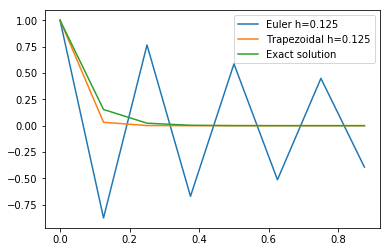

In [10]:
# plt.plot(time_h1, y_euler_h1)
plt.plot(time_h2, y_euler_h2)

plt.plot(time_h2, y_trapezoidal)

plt.plot(time_h2, y_analytical)

labels = ["Euler h=" + str(h2), "Trapezoidal h=" + str(h2), "Exact solution"]
plt.legend(labels)
None

## Using 3-Step Adams-Bashforth method

### Use RK4 to compute first 3 time steps

In [11]:
# Use RK4 to compute first 3 time steps
def ode(t, y):
    return -15 * y

y0 = 1
t0 = 0
tf = 1
h  = 0.01
A_RK4=np.array([[0,0,0],[0.5,0,0],[0,0.5,0],[0,0,1]])
b_RK4=np.array([1/6.,1/3.,1/3.,1/6.])
c_RK4=np.array([0,1/2.,1/2.,1])

time, y_rk4 = RK_solvers.rk_time_stepper([y0], A_RK4, b_RK4, c_RK4, h, t0, tf, ode)

In [12]:
def adams_bashforth(y, n, h, f):
    # Return the solution to for the next time step n+1
    t = n*h
    assert(n >= 2)
    return y[n] + h/12 * (23 * f(t, y[n]) - 16 * f(t, y[n-1]) + 5 * f(t, y[n-2]))

def multi_stepper(initial_tp, integrationMethod, h, t0, tf, f):
    # The array/list initial_tp must contain the r initial solutions
    if len(np.shape(initial_tp)) > 1:
        r, m = np.shape(initial_tp)
    else:
        m = 1
        r = len(initial_tp)
    # Number of time steps to be computed
    N = round((tf-t0) / h)
    time = np.arange(t0, N*h, h)
    # Initialize empty array for the N solutions
    y = np.zeros([N, m])
    # Copy the r initial values to the solution array
    for i in range(r):
        y[i] = initial_tp[i]
    for n in range(r-1, N-1):
        y[n+1] = integrationMethod(y, n, h, f)
    return time, y
    

In [13]:
time_x, y_adams_bashforth = multi_stepper(y_rk4[:3], adams_bashforth, h, t0, tf, ode)

In [14]:
y_analytical_2 = [analytical_solution(y0, time_x[i]) for i in range(len(time_x))]

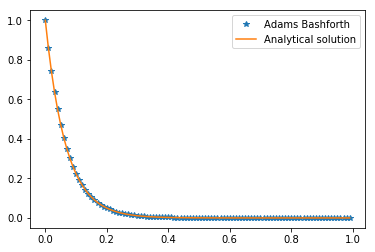

In [15]:
plt.plot(time_x, y_adams_bashforth, "*")
plt.plot(time_x, y_analytical_2)
# plt.plot(time, y_rk4, ".")
plt.legend(["Adams Bashforth", "Analytical solution"])
None